In [30]:
import sys

sys.path.append("/Users/octavia/Dropbox/SVE_v2/utilities")
sys.path.append("/Users/octavia/Dropbox/SVE_v2/model")

my_modules = ['plot_functions', 'load_model_output', 
              'search_functions', 'plot_3D_functions']
for mod in my_modules:
    if mod in sys.modules:
        print (mod)
        del sys.modules[mod]

import ipywidgets as widgets

from search_functions import *
from load_model_output import *
from plot_functions import *
from plot_3D_functions import *



plot_functions
load_model_output
search_functions
plot_3D_functions


In [31]:
dirs = os.listdir(os.path.join(project_dir , 'model_output/'))
dirs = list(set(dirs) - {'.DS_Store'})

select_base_name = widgets.Dropdown(
    options=dirs,
    description='base_name:',
    disabled=False,
)
select_base_name

Dropdown(description='base_name:', options=('test_inflow', 'test_stripe', 'test_GA_infl', 'test_inflow_dt', 't…

In [32]:
base_name = select_base_name.value
base_dir = os.path.join(project_dir, 'model_output', base_name )
print(base_name)
print_input_params(base_dir)

test_stripe
batch:
	Ks : 5.0
	p : 3.0
sim:
	dt_sw : 0.01, 0.005
	dx : 0.25, 0.5, 1.0
common:
	H_i : 0.0


In [33]:
core = load_sims(base_dir)
# core = patchy_update(core)


In [34]:
name_vars = get_name_vars(base_dir)
names =  get_name_tuples(core, name_vars)
core = add_pretty_name(core, name_vars)

select_key = widgets.Dropdown(
        options=names,
        description='Name:')
select_key

Dropdown(description='Name:', options=(('dt_sw=0.01, dx=1.0', 'Ks-5.0,p-3.0/dt_sw-0.01,dx-1.0/'), ('dt_sw=0.01…

In [35]:
select_key.value

'Ks-5.0,p-3.0/dt_sw-0.01,dx-1.0/'

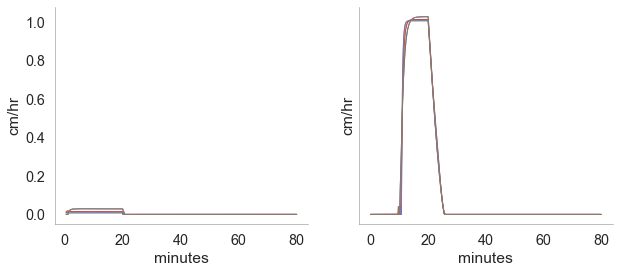

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4), sharey = True)
fig = plot_inflowgraphs(core, trim = 30, nonzero = True, ax= axes[0])
fig = plot_hydrographs(core, nonzero = True, ax = axes[1])


(<Figure size 576x180 with 2 Axes>, <Figure size 576x180 with 2 Axes>)

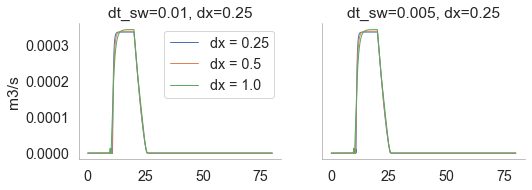

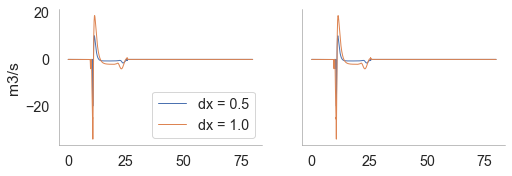

In [37]:
plot_matched_hydrographs(core, "dx")

In [38]:

display(select_key)

Dropdown(description='Name:', options=(('dt_sw=0.01, dx=1.0', 'Ks-5.0,p-3.0/dt_sw-0.01,dx-1.0/'), ('dt_sw=0.01…

In [39]:

key = select_key.value
print(key)
sim = core.loc[key]

Ks-5.0,p-3.0/dt_sw-0.01,dx-1.0/


Ks-5.0,p-3.0/dt_sw-0.01,dx-1.0/


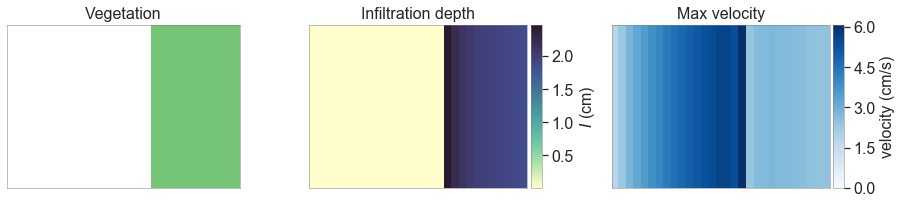

In [40]:

print (sim.name)
fig, axes = triptych(sim);


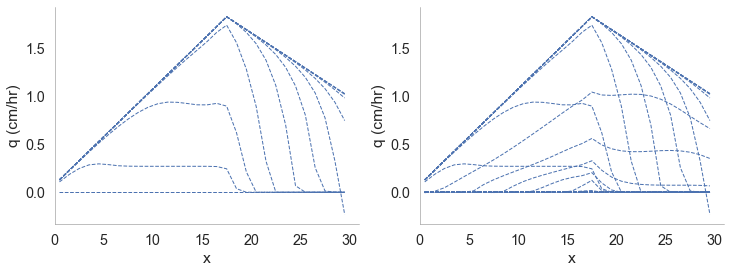

In [41]:
fig,axes = plt.subplots(1, 2, figsize = (12, 4))
fig, ax = plot_all_inflow(sim, t_f = sim.t_rain, freq = 10, label_axes=1, ax = axes[0])
fig, ax = plot_all_inflow(sim, t_f = sim.t_final, freq = 10, label_axes=1, ax = axes[1])

if "q1" in sim:
    axes[0].axvline(sim.q1/sim.ksatV, ls = "--", lw = 0.5, label = r"$L_{max}$")
    axes[1].axvline(sim.q1/sim.ksatV, ls = "--", lw = 0.5, label = r"$L_{max}$")


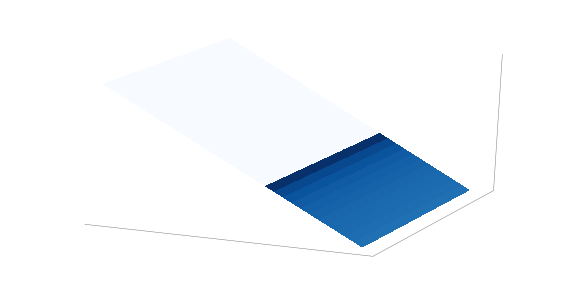

In [42]:
fig = plot_3D_infl(sim)